<a href="https://colab.research.google.com/github/HANEENA001/my-new-repo/blob/main/Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.To predict the profite made by a startup on the basis of expenses incurred and the state where they operate

In [ ]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/colab works/50_Startups.csv')

In [ ]:
len(df)

50

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.shape

(50, 5)

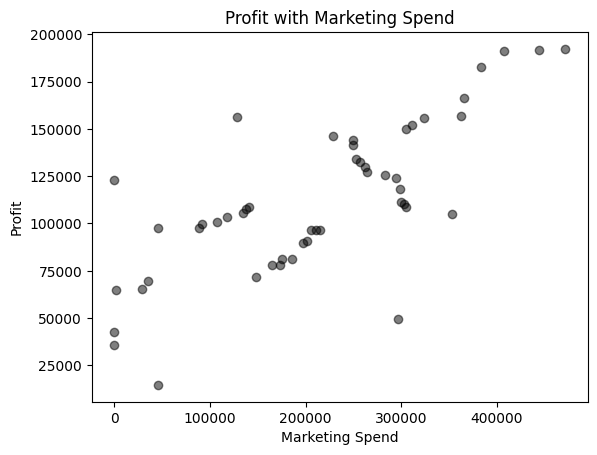

In [ ]:
plt.scatter(df['Marketing Spend'], df['Profit'],color = 'black', alpha=0.5)
plt.title('Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

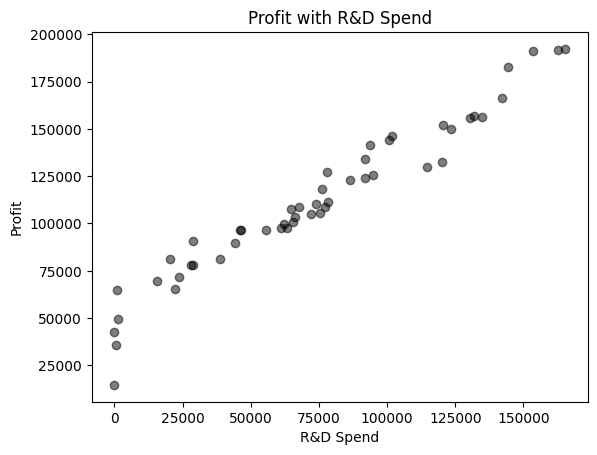

In [ ]:
plt.scatter(df['R&D Spend'], df['Profit'],color = 'black', alpha=0.5)
plt.title('Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

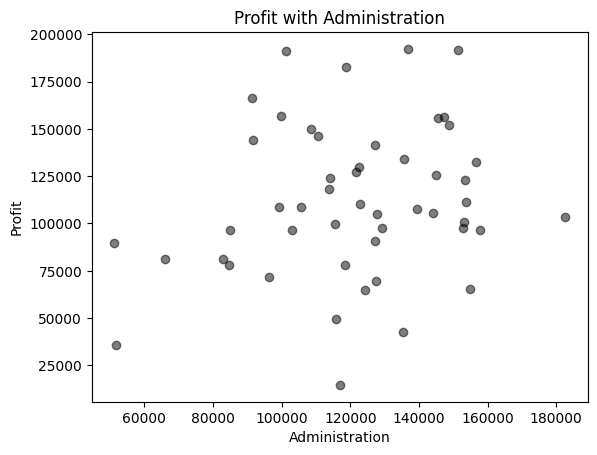

In [ ]:
plt.scatter(df['Administration'], df['Profit'],color = 'black', alpha=0.5)
plt.title('Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

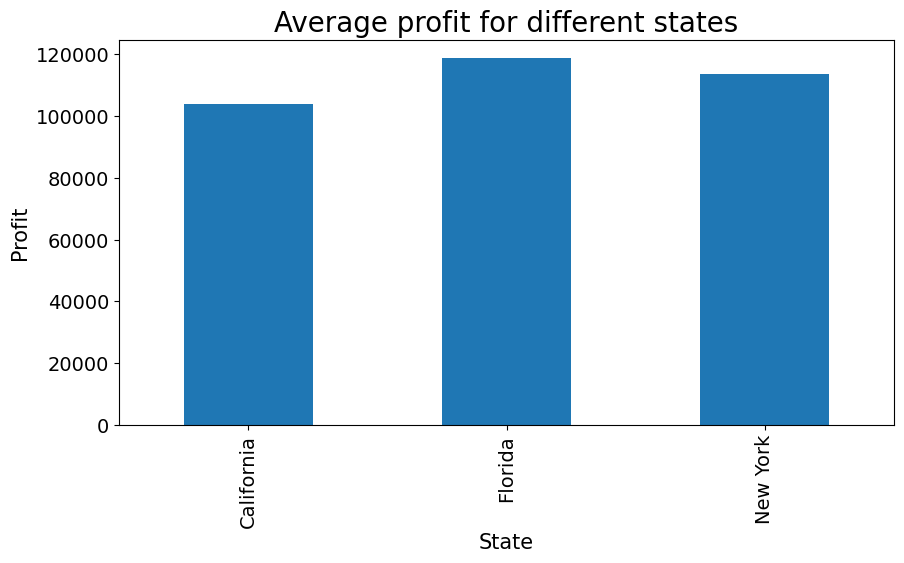

In [ ]:
abc= df.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = (14))
abc.set_title("Average profit for different states", fontsize = 20)
abc.set_xlabel("State", fontsize = 15)
abc.set_ylabel("Profit", fontsize = 15)

In [ ]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [ ]:
df['NewYork'] = np.where(df['State']=='New York', 1, 0)
df['California'] = np.where(df['State']=='California', 1, 0)
df['Florida'] = np.where(df['State']=='Florida', 1, 0)

df.drop(columns=['State'],axis=1,inplace=True)

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork,California,Florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [ ]:
dependent_var = 'Profit'

In [ ]:
independent_var = list(set(df.columns.tolist()) - {dependent_var})

In [ ]:
independent_var

['California',
 'Florida',
 'Marketing Spend',
 'NewYork',
 'R&D Spend',
 'Administration']

In [ ]:
y = df[dependent_var].values

In [ ]:
X = df[independent_var].values

In [ ]:
df[independent_var]

,California,Florida,Marketing Spend,NewYork,R&D Spend,Administration
0,0,0,471784.10,1,165349.20,136897.80
1,1,0,443898.53,0,162597.70,151377.59
2,0,1,407934.54,0,153441.51,101145.55
3,0,0,383199.62,1,144372.41,118671.85
4,0,1,366168.42,0,142107.34,91391.77
5,0,0,362861.36,1,131876.90,99814.71
6,1,0,127716.82,0,134615.46,147198.87
7,0,1,323876.68,0,130298.13,145530.06
8,0,0,311613.29,1,120542.52,148718.95
9,1,0,304981.62,0,123334.88,108679.17


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train[0:10]

array([[0.0000000e+00, 1.0000000e+00, 2.1463481e+05, 0.0000000e+00,
        5.5493950e+04, 1.0305749e+05],
       [0.0000000e+00, 0.0000000e+00, 2.0551764e+05, 1.0000000e+00,
        4.6014020e+04, 8.5047440e+04],
       [0.0000000e+00, 1.0000000e+00, 1.3405007e+05, 0.0000000e+00,
        7.5328870e+04, 1.4413598e+05],
       [1.0000000e+00, 0.0000000e+00, 2.1079767e+05, 0.0000000e+00,
        4.6426070e+04, 1.5769392e+05],
       [0.0000000e+00, 1.0000000e+00, 2.9491957e+05, 0.0000000e+00,
        9.1749160e+04, 1.1417579e+05],
       [0.0000000e+00, 1.0000000e+00, 3.2387668e+05, 0.0000000e+00,
        1.3029813e+05, 1.4553006e+05],
       [0.0000000e+00, 1.0000000e+00, 2.5651292e+05, 0.0000000e+00,
        1.1994324e+05, 1.5654742e+05],
       [0.0000000e+00, 0.0000000e+00, 1.9039300e+03, 1.0000000e+00,
        1.0002300e+03, 1.2415304e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        5.4205000e+02, 5.1743150e+04],
       [0.0000000e+00, 0.0000000e+00,

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:10]

array([[0.        , 1.        , 0.45494286, 0.        , 0.33561668,
        0.48655174],
       [0.        , 0.        , 0.43561799, 1.        , 0.2782839 ,
        0.3173015 ],
       [0.        , 1.        , 0.28413435, 0.        , 0.45557444,
        0.87258866],
       [1.        , 0.        , 0.44680961, 0.        , 0.2807759 ,
        1.        ],
       [0.        , 1.        , 0.62511553, 0.        , 0.55488118,
        0.59103645],
       [0.        , 1.        , 0.68649342, 0.        , 0.7880179 ,
        0.88568959],
       [0.        , 1.        , 0.54370828, 0.        , 0.72539353,
        0.98922572],
       [0.        , 0.        , 0.0040356 , 1.        , 0.0060492 ,
        0.6847981 ],
       [0.        , 0.        , 0.        , 1.        , 0.00327821,
        0.00432296],
       [0.        , 0.        , 0.22709197, 1.        , 0.39676926,
        0.95618996]])

In [ ]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
regression.coef_

array([ 8.66383692e+01, -8.72645791e+02,  1.72720281e+04,  7.86007422e+02,
        1.27892182e+05,  3.49927567e+03])

In [ ]:
regression.intercept_

44153.95466784859

In [ ]:
predict = regression.predict(X_train)

In [ ]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [ ]:
y_pred = regression.predict(X_test)

In [ ]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [ ]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [ ]:
mean_squared_error(y_test,y_pred)

83502864.03257728

In [ ]:
math.sqrt(mean_squared_error(y_train, predict))

9031.66661257897

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

9137.990152794939

In [ ]:
r2_score(y_train, predict)

0.9501847627493607

In [ ]:
r2_score(y_test,y_pred)

0.9347068473282426